In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [11]:
part1 = pd.read_csv('part1.csv')
part1

,Harmonic,Lower Bound (Hz),Upper Bound (Hz),Center (Hz)
0,1,11.1,11.4,11.25
1,2,22.1,22.7,22.40
2,3,32.6,33.8,33.20
3,4,44.5,45.2,44.85
4,5,55.8,56.6,56.20
5,6,67.1,68.0,67.55


In [15]:
harmonics = part1['Harmonic']
lower_bounds = part1['Lower Bound (Hz)']  
upper_bounds = part1['Upper Bound (Hz)']
center_frequencies = part1['Center (Hz)']

frequency_errors = (upper_bounds - lower_bounds)/2

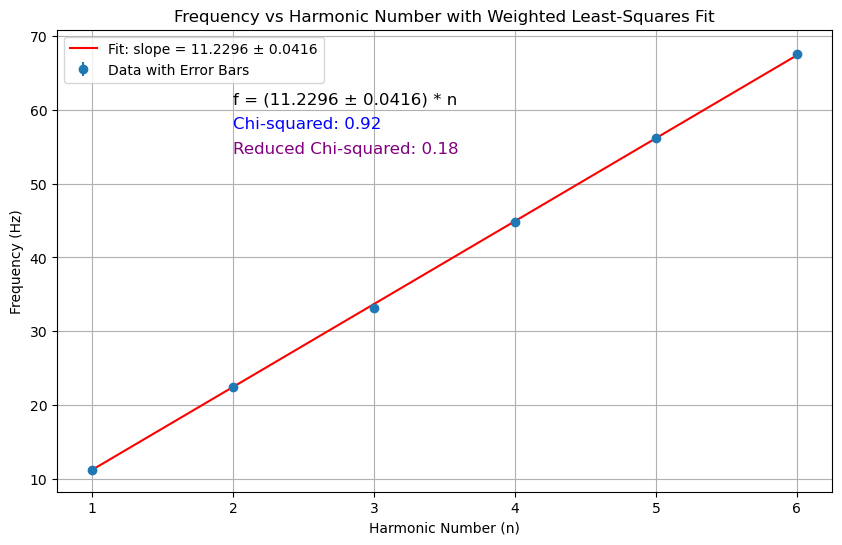

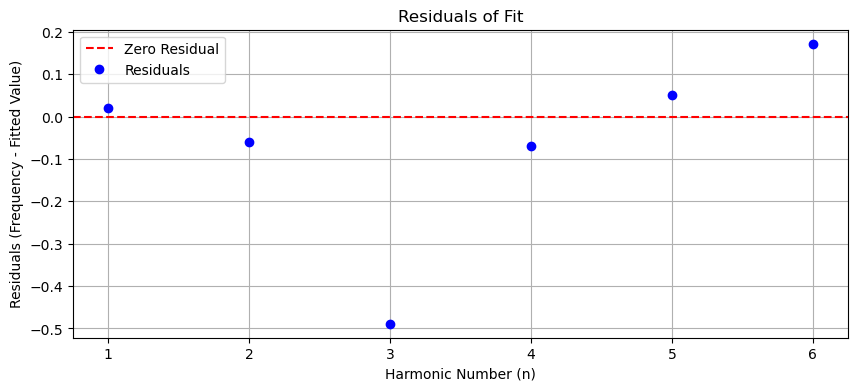

In [20]:
# Redefine the model so that harmonic number n is on the x-axis and frequency f is on the y-axis
def inverse_linear_model(n, slope):
    return slope * n

# Perform the weighted least-squares fit on the harmonics
popt, pcov = curve_fit(inverse_linear_model, harmonics, center_frequencies, sigma=frequency_errors, absolute_sigma=True)
slope = popt[0]
slope_error = np.sqrt(np.diag(pcov))[0]

# Calculate fitted frequencies based on the harmonics
fitted_frequencies = inverse_linear_model(harmonics, slope)
residuals = center_frequencies - fitted_frequencies

# Weighted residuals
residuals_weighted = residuals / frequency_errors
chi_squared = np.sum(residuals_weighted ** 2)
degrees_of_freedom = len(harmonics) - 1
reduced_chi_squared = chi_squared / degrees_of_freedom

plt.figure(figsize=(10, 6))
plt.errorbar(harmonics, center_frequencies, yerr=frequency_errors, fmt='o', label='Data with Error Bars')
plt.plot(harmonics, inverse_linear_model(harmonics, slope), 'r-', label=f'Fit: slope = {slope:.4f} ± {slope_error:.4f}')
plt.xlabel('Harmonic Number (n)')
plt.ylabel('Frequency (Hz)')
plt.title('Frequency vs Harmonic Number with Weighted Least-Squares Fit')
plt.legend()

# Annotate the fitted equation and chi-squared values on the plot
plt.text(2, max(center_frequencies) * 0.9, f'f = ({slope:.4f} ± {slope_error:.4f}) * n', fontsize=12, color='black')
plt.text(2, max(center_frequencies) * 0.85, f'Chi-squared: {chi_squared:.2f}', fontsize=12, color='blue')
plt.text(2, max(center_frequencies) * 0.8, f'Reduced Chi-squared: {reduced_chi_squared:.2f}', fontsize=12, color='purple')

plt.grid(True)
plt.show()

slope, slope_error

# Plot the residuals with error bars
plt.figure(figsize=(10, 4))
plt.errorbar(harmonics, residuals, fmt='o', color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Harmonic Number (n)')
plt.ylabel('Residuals (Frequency - Fitted Value)')
plt.title('Residuals of Fit')
plt.legend()
plt.grid(True)
plt.show()


## part 2


In [7]:
part2 = pd.read_csv('part2.csv')
part2

,mode,estimated_mass,mass,lower,upper
0,2,661.99,396,383,406
1,3,294.21,245,235,255
2,4,165.49,153,148,158
3,5,105.91,103,100,108
4,6,73.55,65,65,65
5,7,54.04,50,50,50


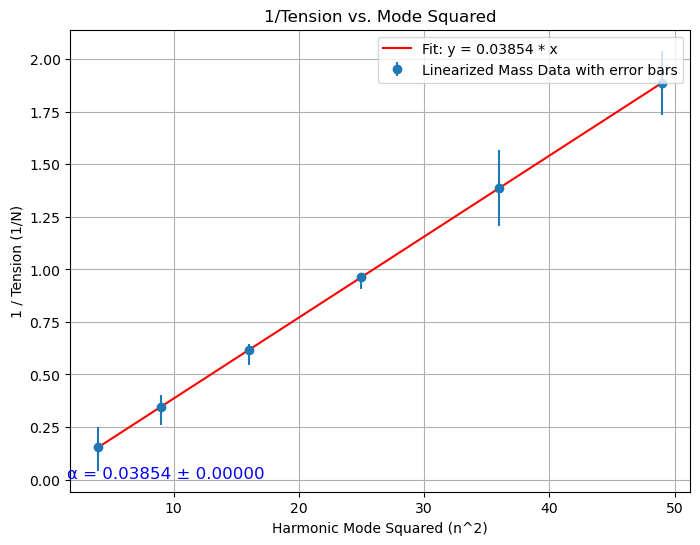

In [26]:
harmonic_modes = np.array([2, 3, 4, 5, 6, 7])
estimated_mass = np.array([661.99, 294.21, 165.49, 105.91, 73.55, 54.04])  * 9.8 / 1000
lower_mass_bound = np.array([383, 235, 148, 100, 65, 50])  *9.8 / 1000
upper_mass_bound = np.array([406, 255, 158, 108, 65, 50]) *9.8/ 1000

inverse_estimated_mass = 1 / estimated_mass
harmonic_modes_squared = harmonic_modes**2
def linear_model(x, alpha):
    return alpha * x

# Perform the fit with the linearized data (1 / mass vs. mode squared)
params_mass, covariance_mass = curve_fit(linear_model, harmonic_modes_squared, inverse_estimated_mass)
alpha_mass = params_mass[0]  # Fitted alpha value for mass data
alpha_mass_error = np.sqrt(covariance_mass[0, 0])  # Error in alpha
lower_error = np.abs(inverse_estimated_mass - 1 / lower_mass_bound)
upper_error = np.abs(1 / upper_mass_bound - inverse_estimated_mass)

# Plotting the data with corrected error bars
plt.figure(figsize=(8, 6))
plt.errorbar(harmonic_modes_squared, inverse_estimated_mass, fmt='o', 
             yerr=[lower_error, upper_error], label='Linearized Mass Data with error bars')
plt.plot(harmonic_modes_squared, linear_model(harmonic_modes_squared, *params_mass), 'r-', label=f'Fit: y = {alpha_mass:.5f} * x')

# Annotating alpha with error on the plot for mass data
plt.text(1.5, 0.005, f"α = {alpha_mass:.5f} ± {alpha_mass_error:.5f}", color="blue", fontsize=12)

plt.xlabel("Harmonic Mode Squared (n^2)")
plt.ylabel("1 / Tension (1/N)")
plt.title("1/Tension vs. Mode Squared")
plt.legend()
plt.grid(True)
plt.show()

# Part 3

In [5]:
part3 = pd.read_csv('part3.csv')
part3

,mode,lower,upper
0,7,122.80,126.35
1,6,105.00,107.40
2,5,88.20,89.20
3,4,69.95,72.50
4,3,52.30,58.70
5,2,32.14,49.20


In [22]:
n_values = part3['mode']
measured_lengths = (part3['upper'] + part3['lower'])/200
length_errors = np.abs(part3['lower'] - part3['upper'])/100
print(measured_lengths)

0    1.24575
1    1.06200
2    0.88700
3    0.71225
4    0.55500
5    0.40670
dtype: float64


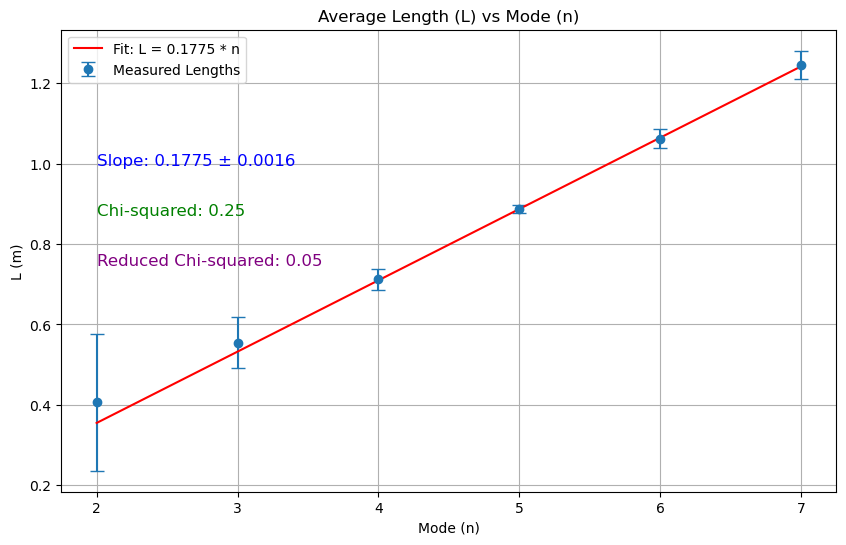

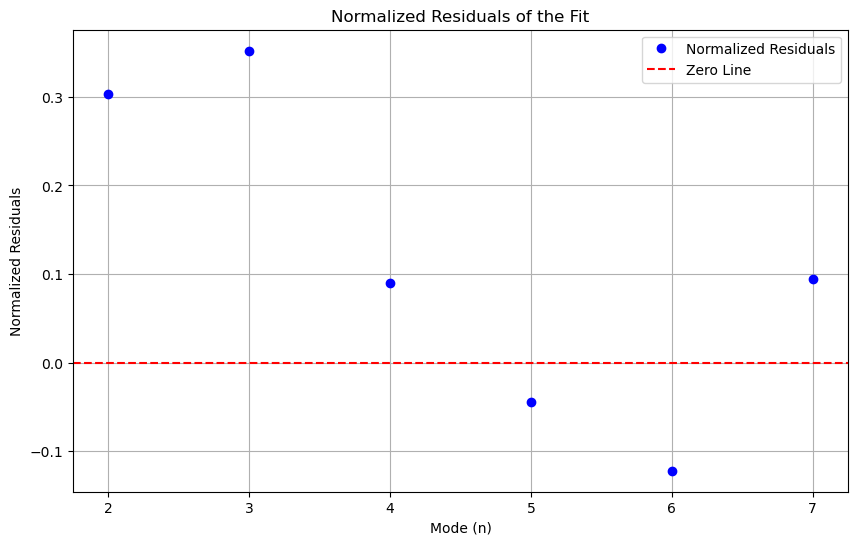

In [24]:
def linear_slope_only(n, a):
    return a * n

popt, pcov = curve_fit(linear_slope_only, part3["mode"], measured_lengths, sigma=length_errors, absolute_sigma=True)
slope = popt[0]
slope_err = np.sqrt(np.diag(pcov))[0]

residuals = measured_lengths - linear_slope_only(part3["mode"], slope)
chi_squared = np.sum((residuals / length_errors) ** 2)
degrees_of_freedom = len(part3["mode"]) - 1
reduced_chi_squared = chi_squared / degrees_of_freedom

normalized_residuals = residuals / length_errors

plt.figure(figsize=(10, 6), dpi=100)
plt.errorbar(part3["mode"], measured_lengths, yerr=length_errors, fmt='o', label='Measured Lengths', capsize=5)
plt.plot(part3["mode"], linear_slope_only(part3["mode"], slope), label=f'Fit: L = {slope:.4f} * n', linestyle='-', color='red')
plt.xlabel('Mode (n)')
plt.ylabel('L (m)')
plt.title('Average Length (L) vs Mode (n)')
plt.legend()

plt.text(min(part3["mode"]), max(measured_lengths) * 0.8, f'Slope: {slope:.4f} ± {slope_err:.4f}', fontsize=12, color='blue')
plt.text(min(part3["mode"]), max(measured_lengths) * 0.7, f'Chi-squared: {chi_squared:.2f}', fontsize=12, color='green')
plt.text(min(part3["mode"]), max(measured_lengths) * 0.6, f'Reduced Chi-squared: {reduced_chi_squared:.2f}', fontsize=12, color='purple')

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(part3["mode"], normalized_residuals, 'o', color='blue', label='Normalized Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Mode (n)')
plt.ylabel('Normalized Residuals')
plt.title('Normalized Residuals of the Fit')
plt.legend()
plt.grid(True)
plt.show()
